<a href="https://colab.research.google.com/github/jaybitrai/ML-Project-on-NYC-Taxi-dataset/blob/main/ML_Project_Regression%20(NYC%20Taxi%20Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**  Jaykumar Bitrai
##### **Team Member 2 -**   
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Here, We're doing the supervised Machine Learning Project (Regression) on the NYC taxi trip dataset and we've the project to prediction of taxi trip duration. We're provided with the dataset to build a model.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/jaybitrai/ML-Project-on-NYC-Taxi-dataset



# **Problem Statement**


**Write Problem Statement Here.**

To build a model that predicts the total ride durations of taxi trips in New York City

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
#Install Library  use to calculate the haversine distance

!pip install haversine

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from haversine import haversine

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/ALMABETTERPROJECTS/ML Project/Data/NYC Taxi Data.csv',encoding='latin1')

### Dataset First View

In [5]:
# Dataset First Look
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
dataset.shape

(1458644, 11)

### Dataset Information

In [7]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [8]:
#Describe the dataset
dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
dataset.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

<Axes: >

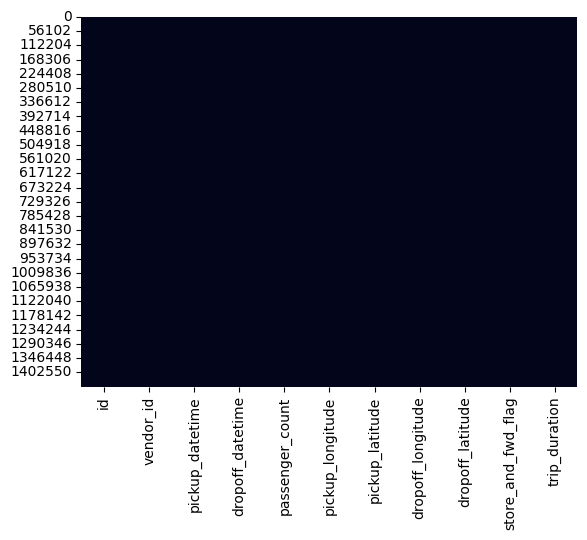

In [11]:
# Visualizing the missing values
sns.heatmap(dataset.isnull(), cbar=False)

### What did you know about your dataset?

Answer Here

We've given a dataset of taxi trip data which contains the geo co-ordinates of Both pickup point and drop point and the time of pickup and dropoff and the ride duration. For more inforation the dataset contains different variables such as vendor id and store and Fwd Flag

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
dataset.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [13]:
# Dataset Describe
dataset.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


### Variables Description

**id** - A unique identifier for each trip

**vendor_id** - A code indicating the provider associated with the trip rec

**pickup_datetime** - Date and time when the meter was engaged

**dropoff_datetime** - Date and time when the meter was disengaged

**passenger_count** - The number of passengers in the vehicle (driver entered value)

**pickup_latitude** - The latitude where the meter was engaged

**pickup_longitude** - The longitude where the meter was engaged

**dropoff_longitude** - The longitude where the meter was
disengaged

**dropoff_latitude** - The latitude where the meter was disengaged

**store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

**trip_duration** - Duration of the trip in seconds

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  id is 1458644 .
No. of unique values in  vendor_id is 2 .
No. of unique values in  pickup_datetime is 1380222 .
No. of unique values in  dropoff_datetime is 1380377 .
No. of unique values in  passenger_count is 10 .
No. of unique values in  pickup_longitude is 23047 .
No. of unique values in  pickup_latitude is 45245 .
No. of unique values in  dropoff_longitude is 33821 .
No. of unique values in  dropoff_latitude is 62519 .
No. of unique values in  store_and_fwd_flag is 2 .
No. of unique values in  trip_duration is 7417 .


## **3**. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.
#Creating a copy
df=dataset.copy()

In [16]:
#Changing datetime column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [17]:
#Avg Trip Duration
df['trip_duration'].mean()

959.4922729603659

In [18]:
#Changing trip_duration column to numeric format
df['trip_duration'] = pd.to_numeric(df['trip_duration'])

<ipython-input-19-aa24594695d0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

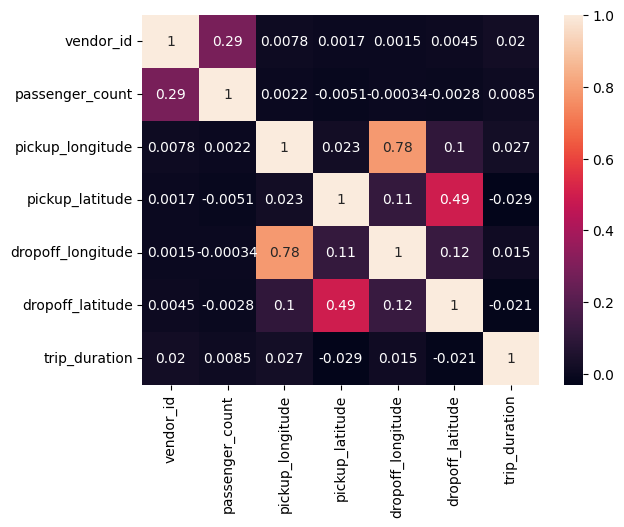

In [19]:
#Heatmap for correlation between individual Variables
sns.heatmap(df.corr(), annot=True)

In [20]:
#Extracting date from DATETIME column
df['date'] = df['pickup_datetime'].dt.date

In [21]:
#Extracting hour from DATETIME column
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_hour'].value_counts()

18    90600
19    90308
21    84185
20    84072
22    80492
17    76483
14    74292
12    71873
15    71811
13    71473
23    69785
11    68476
9     67663
8     67053
10    65437
16    64313
7     55600
0     53248
1     38571
6     33248
2     27972
3     20895
4     15792
5     15002
Name: pickup_hour, dtype: int64

In [22]:
#Extracting day name from DATETIME column
df['day_name'] = df['pickup_datetime'].dt.day_name()
df['day_name'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: day_name, dtype: int64

**Most of the bookings were done on Friday,Saturday,Thursday and as follows**

In [23]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,date,pickup_hour,day_name
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,17,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,0,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,11,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,19,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,13,Saturday


**The Busiest Hours for booking of the day are 18,19,21 and as follows**

In [24]:
#Getting Avg trip duration according to days

df.groupby(['day_name'])['trip_duration'].mean()

day_name
Friday        990.224200
Monday        897.947839
Saturday      948.051175
Sunday        901.639395
Thursday     1006.528654
Tuesday       983.463124
Wednesday     975.450494
Name: trip_duration, dtype: float64

**Trip duration is high on Friday, Monday, Saturday and as follows**

In [25]:
#Creating empty column trip_duration_period
df['trip_duration_period'] = ''

In [26]:
#Function to extract Type of trip duration

def get_period (time):
  if time <= 900:
    time_period = "Extremely Short Trip (less than 16 mins)"
  elif time < 1800:
    time_period = "Very Short Trip (less than half hour and greater than 15 mins)"
  elif time < 3600:
    time_period = "Short Trip (less than 1 hour and greater than half hour)"
  elif time < 7200:
   time_period = "Medium Trip (less than 2 hours and greater than 1 hour)"
  else:
    time_period = "Long Trip (greater than 2 hours)";
  return(time_period)

In [27]:
#Creating column for type of trip duration
df['trip_duration_period'] = df.apply(lambda x:get_period(x['trip_duration']),axis=1)

In [28]:
#Visualization of type of trip duration
df['trip_duration_period'].value_counts()

Extremely Short Trip (less than 16 mins)                          968476
Very Short Trip (less than half hour and greater than 15 mins)    376855
Short Trip (less than 1 hour and greater than half hour)          100979
Medium Trip (less than 2 hours and greater than 1 hour)            10081
Long Trip (greater than 2 hours)                                    2253
Name: trip_duration_period, dtype: int64

In [29]:
#Extracting timing type of the day
def timing_distribution (hour):
  if hour>5 and hour<12:
    time_period = "Morning"
  elif hour>11 and hour<18:
    time_period = "Afternoon"
  elif hour>17 and hour<21:
     time_period = "Evening"
  else:
    time_period = "Night";
  return(time_period)

In [30]:
#Creating column to extract timing type of the day
df['day_type'] = ''

In [31]:
# extracting timing type of the day
df['day_type'] = df.apply(lambda x:timing_distribution(x['pickup_hour']),axis=1)

In [32]:
#Visualization of timing type of the day
df['day_type'].value_counts()

Afternoon    430245
Night        405942
Morning      357477
Evening      264980
Name: day_type, dtype: int64

In [33]:
#calc_distance is a function to calculate distance between pickup and dropoff coordinates using Haversine formula.
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop)

In [34]:
#Calculate distance and assign new column to the dataframe.
df["distance"] = df.apply(lambda x: calc_distance(x),axis=1)

### What all manipulations have you done and insights you found?

**We've extracted the day name and created a column with it
To get more insights We've got more deep and got the pickup time by hour and creaeted a column for the timing type of day (Morning,Evening,Afternoon,Night)
We've also extracted the type of trip duration based on the trip duration
Visualized the correlation using heatmap**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bar Chart for **Pickup hour vs Bookings**

Text(0, 0.5, 'Number of bookings')

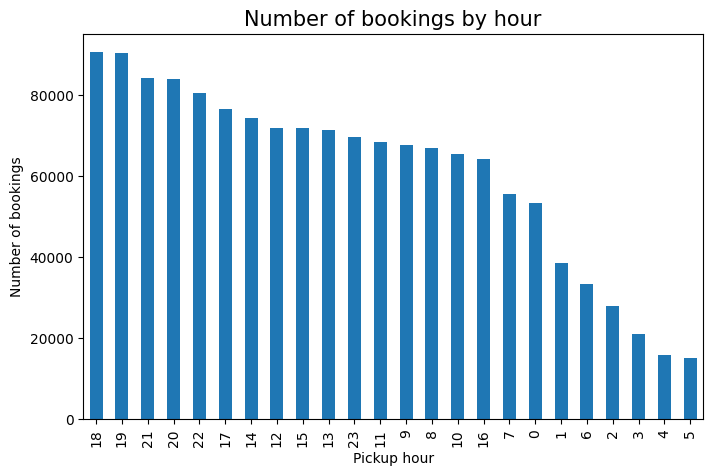

In [35]:
# Chart - 1 visualization code
# Create the figure object
ax = df['pickup_hour'].value_counts().plot.bar(
    figsize = (8,5),
    fontsize = 10
)

# Set the title
ax.set_title("Number of bookings by hour", fontsize = 15)

# Set x and y-labels
ax.set_xlabel("Pickup hour", fontsize = 10)
ax.set_ylabel("Number of bookings", fontsize = 10)

##### 1. Why did you pick the specific chart?

**Because It has more number of X Values
It is good to visualize in bar chart**

##### 2. What is/are the insight(s) found from the chart?

**The maximum number of bookings were done on 18,19,21 and as follows hour of the day**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Helps in creating positive business impact as we can see there is more demand on the 18,19 and 21 hour of the day**

#### Chart - 2 Pickup Day vs Bookings

Text(0, 0.5, 'Number of bookings')

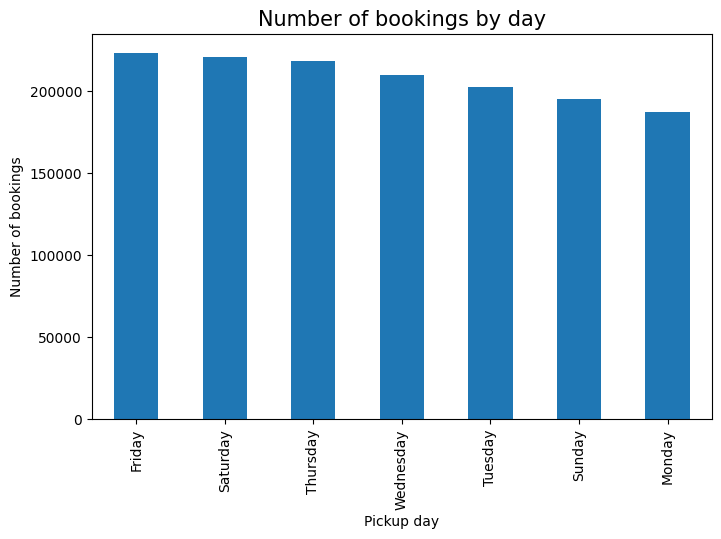

In [36]:
# Chart - 2 visualization code
# Create the figure object
ax = df['day_name'].value_counts().plot.bar(
    figsize = (8,5),
    fontsize = 10
)

# Set the title
ax.set_title("Number of bookings by day", fontsize = 15)

# Set x and y-labels
ax.set_xlabel("Pickup day", fontsize = 10)
ax.set_ylabel("Number of bookings", fontsize = 10)

##### 1. Why did you pick the specific chart?

**I'd extracted the bookings according the days of week and it would be more easy to visualize using bar chart**

##### 2. What is/are the insight(s) found from the chart?

**Maximum number of bookings were done on Friday, Saturday and Thursday.
But we can see here, there is not much difference on least and the most number of booking by day**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes the gained insight will create a positive business impact as we can see there is more demand on Weekends**

#### Chart - 3 Pie Chart by **Vendor ID**

<Axes: ylabel='vendor_id'>

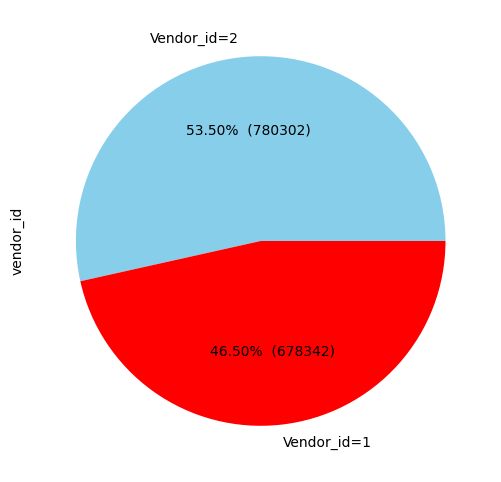

In [37]:
# Chart - 3 visualization code
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
df['vendor_id'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct=make_autopct(list(df['vendor_id'].value_counts())),
                               labels=['Vendor_id=2','Vendor_id=1'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

##### 1. Why did you pick the specific chart?

**There were only two values of vendor_id so it is better to visuaize it on pie chart and easy to gain insights. We've done to check each vendor distribution**

##### 2. What is/are the insight(s) found from the chart?

**The more number of bookings were done by vendor id 2 but we can see there is no much difference within them**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes. We can see that vendor 2 has done more bookings than vendor 1**

#### Chart - 4 Bar Chart by **Passenger Count**

Text(0, 0.5, 'Number of Bookings')

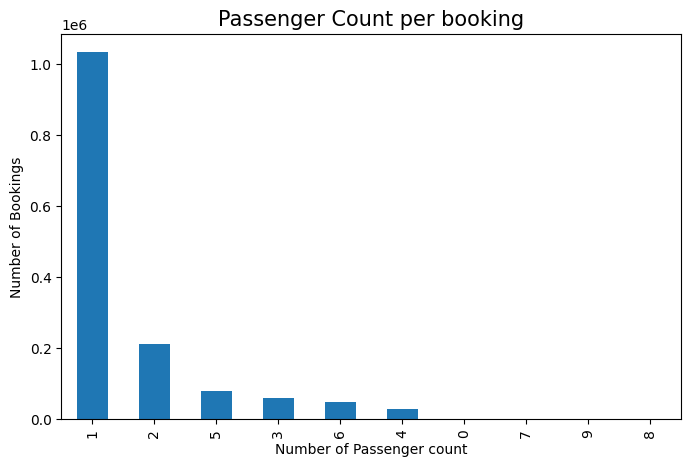

In [38]:
# Chart - 4 visualization code
ax = df['passenger_count'].value_counts().plot(kind='bar',figsize=(8,5))

#variance = 0.2 Million

# Set the title
ax.set_title("Passenger Count per booking", fontsize = 15)

# Set x and y-labels
ax.set_xlabel("Number of Passenger count", fontsize = 10)
ax.set_ylabel("Number of Bookings", fontsize = 10)

##### 1. Why did you pick the specific chart?

**We've done this to visualize the number of passenger count by booking (i.e no of passenger in one booking) It has more values so we'd choose bar chart**

##### 2. What is/are the insight(s) found from the chart?

**We can clearly see here that number of maximum bookings had passenger count of 1 and 2. We can also see that barely minimum number of bookings were done with passenger count 7 8 and 9**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes. We can see that many bookings were done by 1 and 2 passenger count.
So we can use the 3 or 4 seater vehicle more**

#### Chart - 5 Bar Chart for **duration** *period wise*

Text(0, 0.5, 'Number of Bookings')

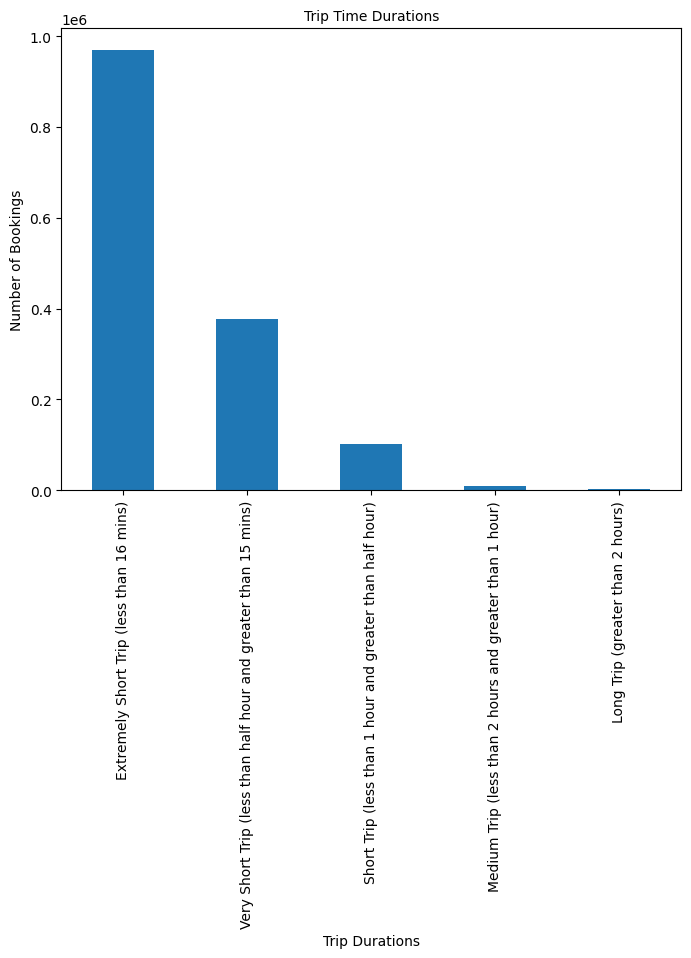

In [39]:
# Chart - 5 visualization code
ax = df['trip_duration_period'].value_counts().plot(kind='bar',figsize=(8,6))

ax.set_title ("Trip Time Durations", fontsize = 10)

ax.set_xlabel("Trip Durations", fontsize = 10)
ax.set_ylabel("Number of Bookings", fontsize = 10)


##### 1. Why did you pick the specific chart?

**We've extracted the type of trip duration based on the trip duration
We've used the bar chart because it was easy to visualize according to bar chart**

##### 2. What is/are the insight(s) found from the chart?

**Most of the bookings were done for the short time.
As we can see nearly 80% of bookings were done for less than 30 mins**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes. I'll have a positive impact as we can see there is high demand for short trip duration we can go accordingly**

#### Chart - 6 Pie Chart **Store and Fwd Flag**

<Axes: ylabel='store_and_fwd_flag'>

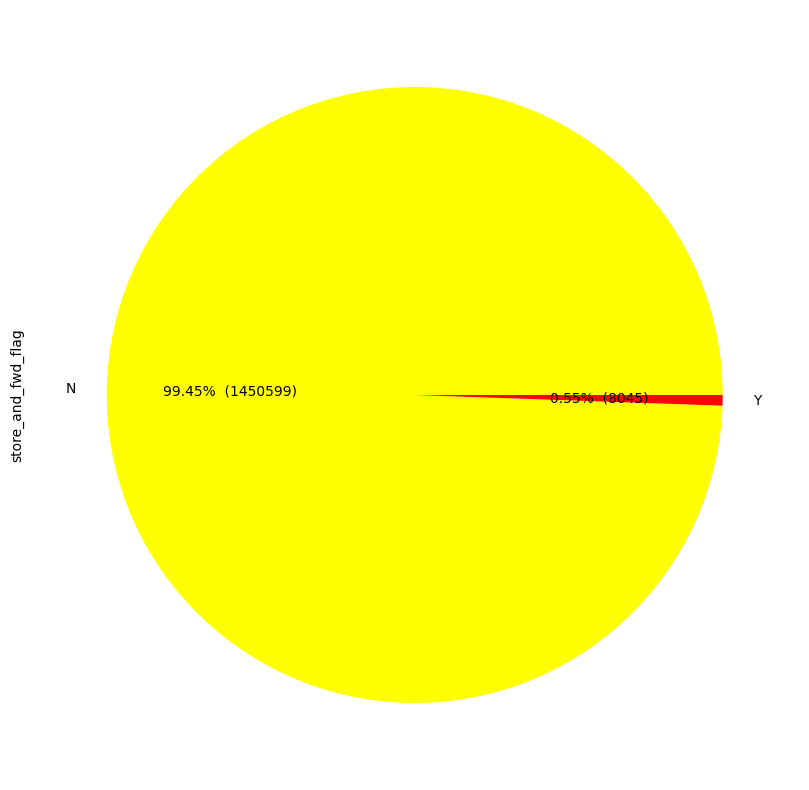

In [40]:
# Chart - 6 visualization code
df['store_and_fwd_flag'].value_counts().plot(kind='pie',
                              figsize=(20,10),
                               autopct=make_autopct(list(df['store_and_fwd_flag'].value_counts())),
                               colors=['yellow','red'],
                               explode=[0,0]
                              )

##### 1. Why did you pick the specific chart?

**As there were only 2 values, It is good to visualize using pie chart**

##### 2. What is/are the insight(s) found from the chart?

**The most bookings data weren't stored and forwarded.
Only less than 1% were stored and forwarded**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**No impact**

#### Chart - 7 Pie Chart Distribution by Day type

<Axes: ylabel='day_type'>

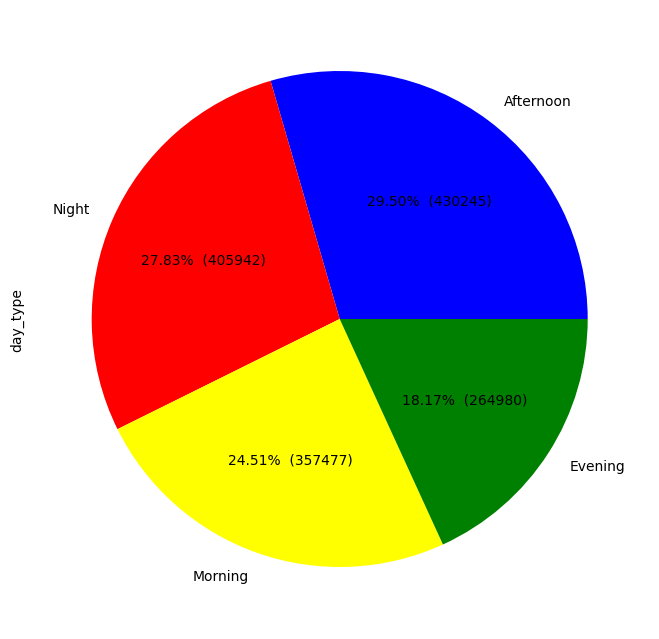

In [41]:
# Chart - 7 visualization code
df['day_type'].value_counts().plot(kind='pie',
                              figsize=(8,10),
                               autopct=make_autopct(list(df['day_type'].value_counts())),
                               colors=['blue','red','yellow','green']
                              )

##### 1. Why did you pick the specific chart?

**As there were less values so It was better to visualize using pie chart
We've created the distribution of day type by bookings**

##### 2. What is/are the insight(s) found from the chart?

**As we can see, We had the overall demand same for every period of the day.
Only the evening period was having low demand comparatively**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Yes. We've to keep working the portal overall as we have booking of all the type of day**

**Chart 8 - Multicollinearity Chart**

<ipython-input-42-b21c2abc2e00>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

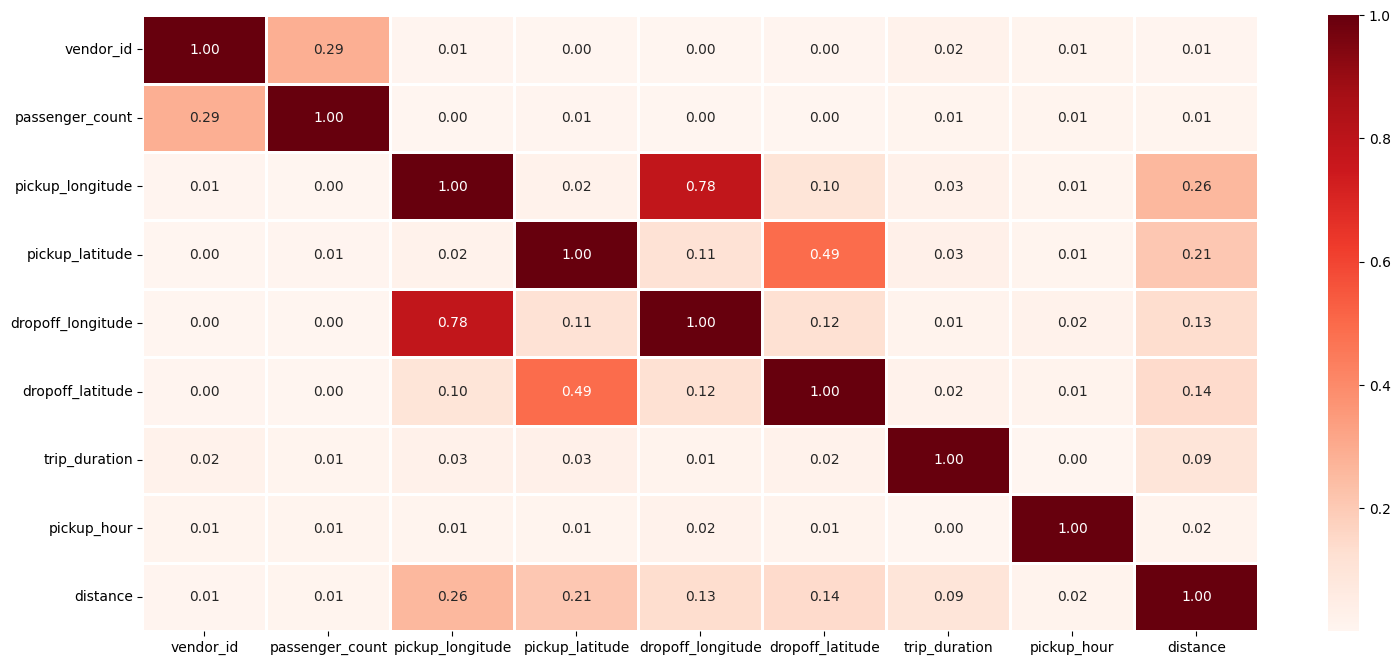

In [42]:
# Chart - 12 visualization code
plt.figure(figsize=(18,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=2,fmt=".2f")

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

**Dealing with Multicollinearity**

In [46]:
# Dealing with multicollinearity using VIF analysis.
# Calculating VIF(Variation Inflation Factor) to see the correlation between independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

### 1. Handling Missing Values

**No Missing values were found**

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

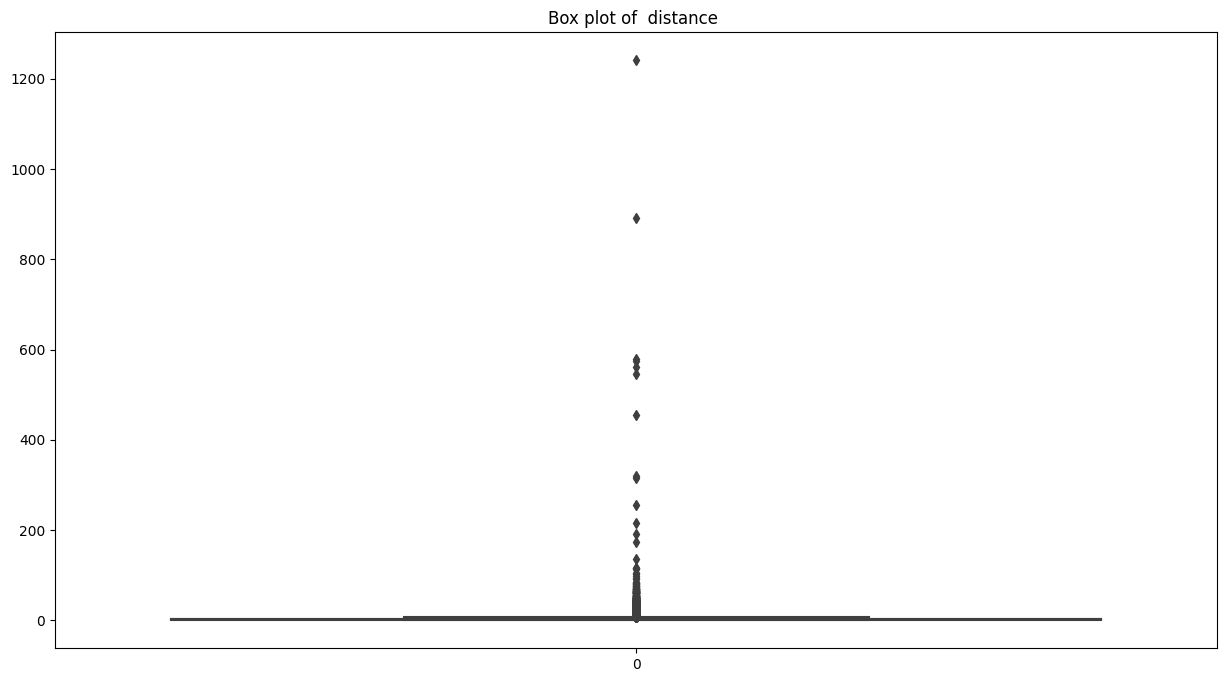

In [47]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=df['distance'], orient="v")

In [48]:
percentile_q1 = np.percentile(df['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(df['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(df['distance'],75)
print(percentile_q3)

1.231838267692074
2.0937200248916445
3.8753427710757147


In [49]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.733418487383387
Upper limit for outlier  : 7.840599526151175


In [50]:
df=df[df['distance']>lower_limit_outlier]
df=df[df['distance']<upper_limit_outlier]

In [51]:
df.shape

(1317971, 17)

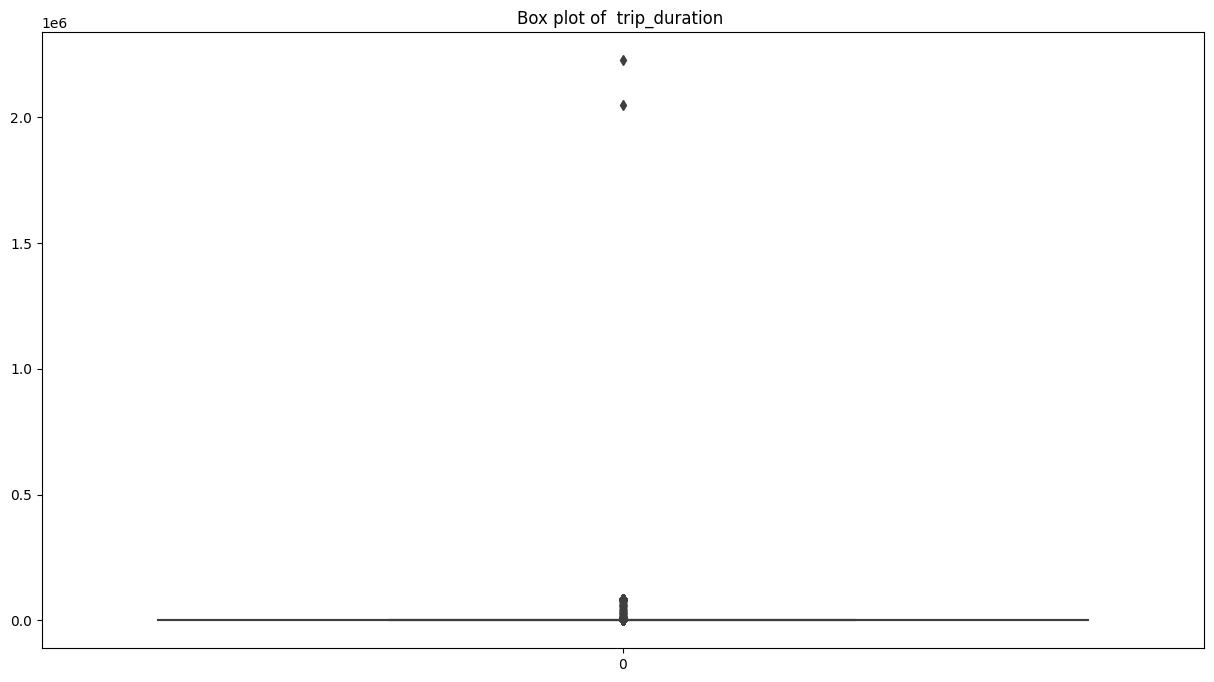

In [52]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=df['trip_duration'], orient="v")

In [53]:
percentile_q1_trip_duration = np.percentile(df['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(df['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(df['trip_duration'],75)
print(percentile_q3_trip_duration)

373.0
605.0
931.0


In [54]:
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -464.0
Upper limit for outlier  : 1768.0


In [55]:
df=df[df['trip_duration']>0]
df=df[df['trip_duration']<upper_limit_outlier_trip_duration]

In [56]:
df.shape

(1277396, 17)

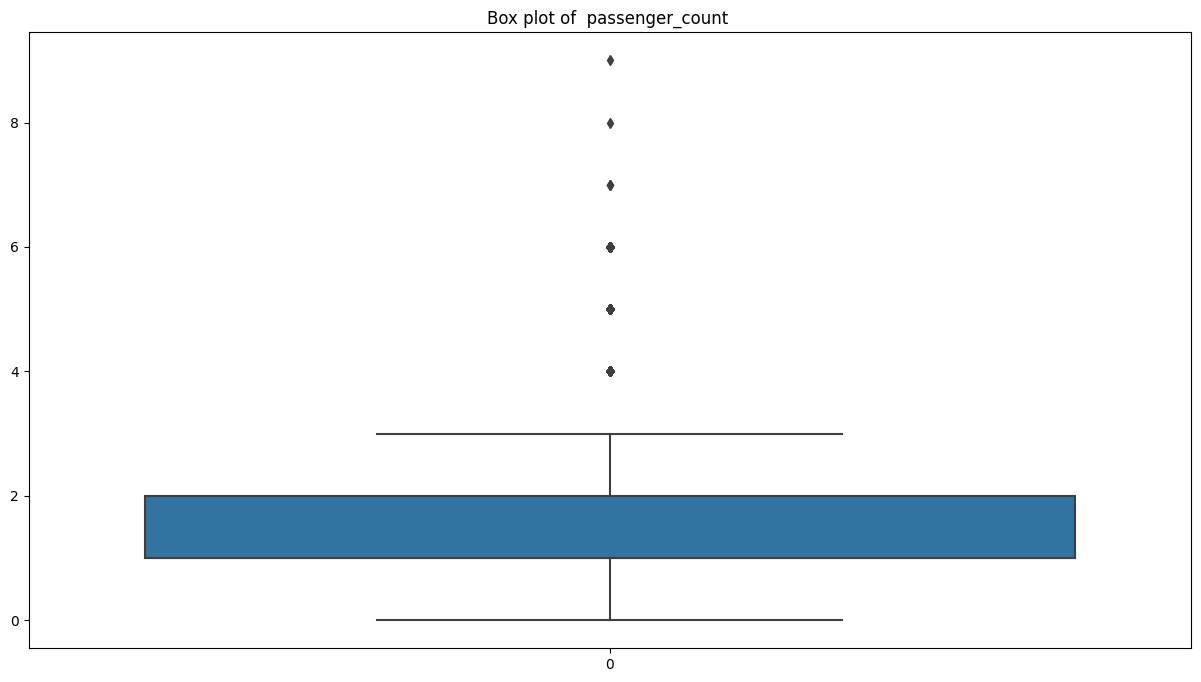

In [57]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  passenger_count ")
ax = sns.boxplot(data=df['passenger_count'])

In [58]:
percentile_q1_passenger_count = np.percentile(df['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(df['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(df['passenger_count'],75)
print(percentile_q3_passenger_count)

1.0
1.0
2.0


In [59]:
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [60]:
nyc_df=df[df['passenger_count']>0]
nyc_df=df[df['passenger_count']<upper_limit_outlier_passenger_count]

In [61]:
df.shape

(1277396, 17)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outlier Detection using IQR Method
IQR=Q3-Q1

lower_limit_outlier=Q1-1.5*IQR

upper_limit_outlier=Q3+1.5*IQR¶

so we have to take the values which is greater then lower limit outlier and less then upper limit outlier remove the outlier present in distance



### 3. Categorical Encoding

In [62]:
# Encode your categorical columns
df = pd.get_dummies(df,columns=['store_and_fwd_flag','day_name','trip_duration_period','day_type','vendor_id','passenger_count'],drop_first=False)

#### What all categorical encoding techniques have you used & why did you use those techniques?

We've used the columns for which has minimum categories and got their dummies and dropped their main column and naming the column with their original name and then their value

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [63]:
# Expand Contraction

#### 2. Lower Casing

In [64]:
# Lower Casing

#### 3. Removing Punctuations

In [65]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [66]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [67]:
# Remove Stopwords

In [68]:
# Remove White spaces

#### 6. Rephrase Text

In [69]:
# Rephrase Text

#### 7. Tokenization

In [70]:
# Tokenization

#### 8. Text Normalization

In [71]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [72]:
# POS Taging

#### 10. Text Vectorization

In [73]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [74]:
# Manipulate Features to minimize feature correlation and create new features
#Checking vif to minimize feature correlation
calc_vif(df[[i for i in df.describe().columns if i not in ['trip_duration']]])

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,pickup_longitude,16.886119
1,pickup_latitude,2.693088
2,dropoff_longitude,16.888567
3,dropoff_latitude,2.678606
4,pickup_hour,1.428576
5,distance,1.567974
6,store_and_fwd_flag_N,inf
7,store_and_fwd_flag_Y,inf
8,day_name_Friday,inf
9,day_name_Monday,inf


#### 2. Feature Selection

In [75]:
df.columns

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'trip_duration', 'date', 'pickup_hour', 'distance',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'day_name_Friday',
       'day_name_Monday', 'day_name_Saturday', 'day_name_Sunday',
       'day_name_Thursday', 'day_name_Tuesday', 'day_name_Wednesday',
       'trip_duration_period_Extremely Short Trip (less than 16 mins)',
       'trip_duration_period_Very Short Trip (less than half hour and greater than 15 mins)',
       'day_type_Afternoon', 'day_type_Evening', 'day_type_Morning',
       'day_type_Night', 'vendor_id_1', 'vendor_id_2', 'passenger_count_0',
       'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'passenger_count_7', 'passenger_count_8', 'passenger_count_9'],
      dtype='object')

In [76]:
# Select your features wisely to avoid overfitting
features = [ 'vendor_id_1', 'vendor_id_2', 'passenger_count_0',
       'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'passenger_count_7', 'passenger_count_8', 'passenger_count_9',
       'pickup_hour', 'distance', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'day_name_Friday', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday',
       'trip_duration_period_Extremely Short Trip (less than 16 mins)',
       'trip_duration_period_Very Short Trip (less than half hour and greater than 15 mins)',
       'day_type_Afternoon', 'day_type_Evening', 'day_type_Morning',
       'day_type_Night']

##### What all feature selection methods have you used  and why?

I've used the features that are having relation with the total trip duration timing

##### Which all features you found important and why?

**No Correlation was found**

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [77]:
# Transform Your data

### 6. Data Scaling

In [78]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [79]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [80]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [81]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 **Linear Regression**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [82]:
y = np.log10(df['trip_duration'])

In [83]:
df[features].head()

,vendor_id_1,vendor_id_2,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,...,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,trip_duration_period_Extremely Short Trip (less than 16 mins),trip_duration_period_Very Short Trip (less than half hour and greater than 15 mins),day_type_Afternoon,day_type_Evening,day_type_Morning,day_type_Night
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
5,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [84]:
df.columns

Index(['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'trip_duration', 'date', 'pickup_hour', 'distance',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'day_name_Friday',
       'day_name_Monday', 'day_name_Saturday', 'day_name_Sunday',
       'day_name_Thursday', 'day_name_Tuesday', 'day_name_Wednesday',
       'trip_duration_period_Extremely Short Trip (less than 16 mins)',
       'trip_duration_period_Very Short Trip (less than half hour and greater than 15 mins)',
       'day_type_Afternoon', 'day_type_Evening', 'day_type_Morning',
       'day_type_Night', 'vendor_id_1', 'vendor_id_2', 'passenger_count_0',
       'passenger_count_1', 'passenger_count_2', 'passenger_count_3',
       'passenger_count_4', 'passenger_count_5', 'passenger_count_6',
       'passenger_count_7', 'passenger_count_8', 'passenger_count_9'],
      dtype='object')

In [85]:
from scipy.stats import zscore
#Train test split
X = df[features].apply(zscore)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(1021916, 29)
(255480, 29)


In [87]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [88]:
reg.score(X_train, y_train)

0.5402676800826615

In [89]:
reg.coef_

array([-2.78565945e+09, -2.78565945e+09,  2.94508793e+09,  2.05210772e+11,
        1.58162207e+11,  8.96022844e+10,  6.21977118e+10,  1.01619216e+11,
        8.10352755e+10,  6.94177740e+08,  4.00784019e+08,  4.00784019e+08,
        1.49354936e-02,  1.33021792e-01, -2.05151096e+11, -2.05151096e+11,
       -8.10717134e+10, -7.52741565e+10, -8.16220146e+10, -7.67665138e+10,
       -7.99543707e+10, -7.78998907e+10, -7.88886961e+10,  7.14400386e+10,
        7.14400386e+10,  2.15886464e+11,  1.85069442e+11,  2.05216655e+11,
        2.12081615e+11])

In [90]:
y_pred = reg.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 67827.80190374338
RMSE : 260.4377121381298


In [92]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5207453584593928
Adjusted R2 :  0.5206909510035124


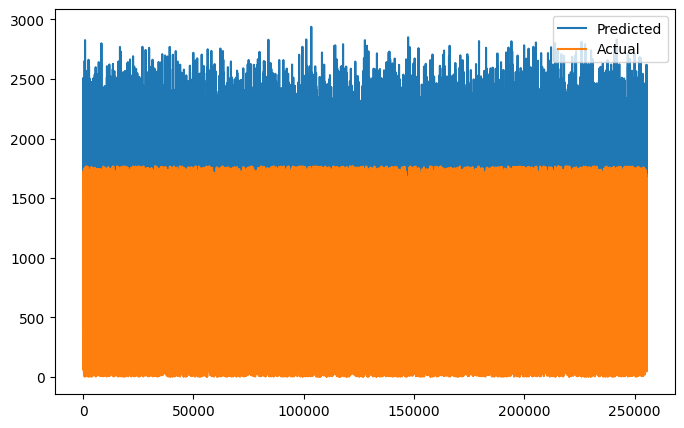

In [117]:
#Visualizing the evaluation metric chart
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 **Lasso Regression**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [95]:
lasso.score(X_train, y_train)

0.37980710399276785

In [96]:
y_pred_l = lasso.predict(X_test)

In [97]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 80073.03371356113
RMSE : 282.9717896073054
R2 : 0.4342235485690452
Adjusted R2 :  0.4341593187115722


#### 2. Cross- Validation & Hyperparameter Tuning

In [98]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV


In [99]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.231e+02, tolerance: 6.045e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.590e+02, tolerance: 6.086e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.276e+02, tolerance: 6.051e

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [100]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.04090607279201214


In [101]:
y_pred_lasso = lasso_regressor.predict(X_test)

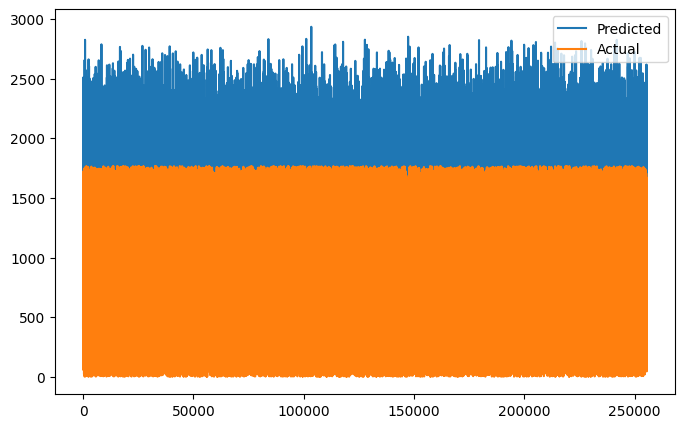

In [102]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [103]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 67771.15728439586
RMSE : 260.32894054329773
R2 : 0.5211455954710409
Adjusted R2 :  0.5210912334521278


##### Which hyperparameter optimization technique have you used and why?

We've used the RMSE and r2 Score to check the prediction of the model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 Ridge Regression

In [104]:
#Importing Library
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [105]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [106]:
ridge.score(X_train, y_train)

0.5402736060759219

In [107]:
y_pred_r = ridge.predict(X_test)

In [108]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 67782.88600587158
RMSE : 260.3514663025188
R2 : 0.5210627231967107
Adjusted R2 :  0.5210083517697102


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [109]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [110]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [111]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08}

Using  {'alpha': 1e-08}  the negative mean squared error is:  -0.040906076320569425


In [112]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [113]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 67782.89871023467
RMSE : 260.3514907010034
R2 : 0.5210626334307916
Adjusted R2 :  0.5210082619936004


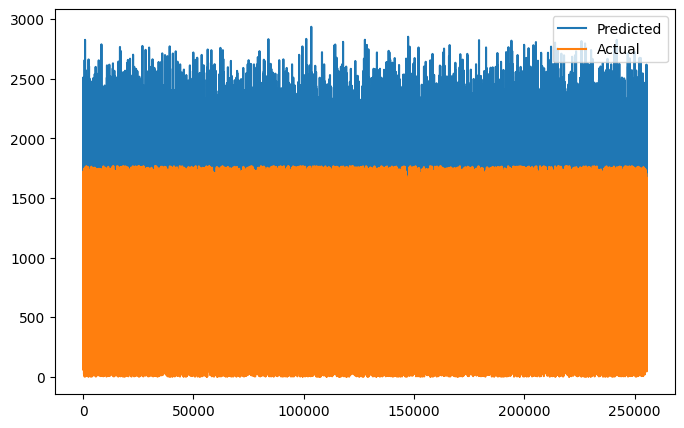

In [114]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We've used the RMSE, MSE and R2 score hyperparameter to check the accuracy of the model

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**ML Model 2 - Lasso Regeression is the best performing model for me because it has the higher r2 score compared to both**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**We've use the features that can be responsible for the travel time**

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [115]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [116]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

We can see that MSE and RMSE which are the metrics used to evaluate the performance of regression model of Linear, Lasso and Ridge.
They have nearly the same RMSE score


The Linear models don't show good performance on our training and testing environment.

We can conclude that the best performing model for our data is lasso regression

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***